In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
from sklearn.metrics import confusion_matrix, balanced_accuracy_score, matthews_corrcoef, f1_score
from mlxtend.plotting import plot_confusion_matrix

### Test results

In [3]:
RESULTS_CSV = 'csv/labels_vanilla_attention_12.csv'
# RESULTS_CSV = 'csv/labels_nystromformer_1.csv'
# RESULTS_CSV = 'csv/labels_linformer_1.csv'
# RESULTS_CSV = 'csv/labels_cosformer_2.csv'
MAT_IMG_PATH = 'img/cm_vanilla_12_no_legend.png'

In [4]:
with open(RESULTS_CSV) as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    for i, row in enumerate(csv_reader):
        list_labels = []
        for cell in row:
            list_labels.append(int(cell))
        if i == 0:
            predicted = list_labels
        else:
            labels = list_labels

In [72]:
predicted_ds = pd.Series(predicted)
labels_ds = pd.Series(labels)

In [73]:
# labels_ds.value_counts()

In [74]:
# predicted_ds.unique()

In [75]:
# predicted_ds.value_counts()

<Axes: title={'center': 'predicted labels'}, xlabel='Label', ylabel='Frequency'>

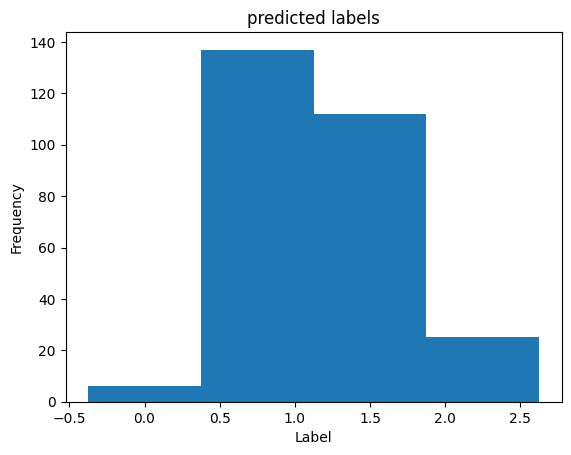

In [76]:
predicted_ds.plot(kind='hist', bins=4, title='predicted labels', xlabel='Label', align='left') # xticks=[x for x in range(21)]

<Axes: title={'center': 'true labels'}, xlabel='Label', ylabel='Frequency'>

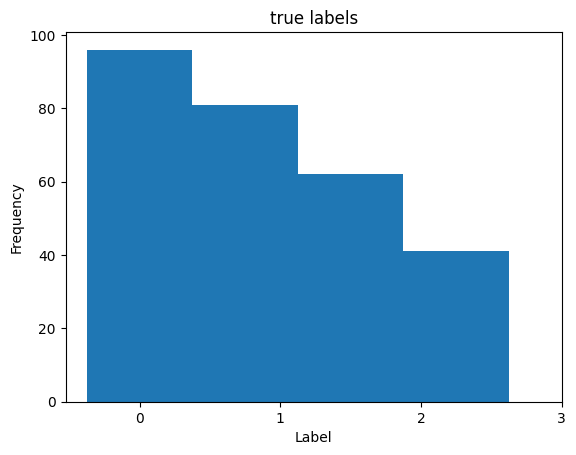

In [77]:
labels_ds.plot(kind='hist', bins=4, title='true labels', xticks=[x for x in range(4)], xlabel='Label', align='left')

In [5]:
confusion_mat = confusion_matrix(labels, predicted, labels=[x for x in range(4)], sample_weight=None, normalize=None)

In [6]:
confusion_mat

array([[ 1, 54, 31, 10],
       [ 3, 51, 19,  8],
       [ 0,  8, 53,  1],
       [ 2, 24,  9,  6]], dtype=int64)

In [7]:
# plt.matshow(confusion_mat)

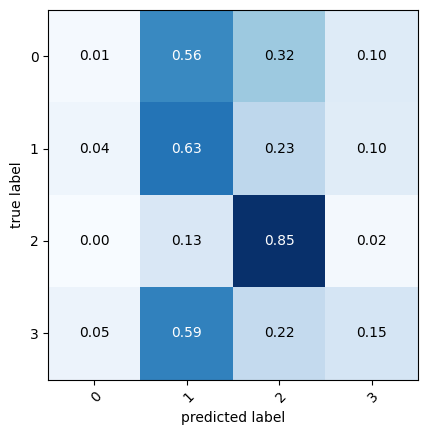

In [8]:
figure, ax = plot_confusion_matrix(conf_mat = confusion_mat,
                                   class_names = [i for i in range(4)],
                                   show_absolute = False,
                                   show_normed = True,
                                   colorbar = False)

plt.savefig(MAT_IMG_PATH)
plt.show()


In [82]:
matthews = matthews_corrcoef(labels, predicted)
matthews

0.22215649279324612

In [56]:
f1 = f1_score(labels, predicted, average='weighted')
f1

0.037405429461504235